# Part II - Ford GoBike Explanatory Analysis
## by (Jumanah Almatrood)

## Investigation Overview


> The goal of this presentation is to explore trip patterns in the Ford GoBike bike-sharing system 
and present the most important insights in a clear, visual way. 

**Key Insights (Executive Summary):**
- Most trips are short (less than 20 minutes).
- Peak usage occurs during commute hours (8 AM and 5 PM).
- Subscribers make up the majority of trips and are most active during commuting hours.
- Trip duration is slightly shorter for subscribers than customers, regardless of gender.
- Gender has little effect on trip duration, but male riders dominate usage counts. 


## Dataset Overview and Executive Summary

> This dataset contains trip data from the Ford GoBike bike-sharing system for February 2019.
It includes trip times, start and end stations, trip duration, user type (Customer or Subscriber), 
gender, and birth year.

**Summary of Findings Supported by Visualizations:**
- Trip duration distribution is right-skewed with a few long trips as outliers.
- There are clear peaks in ride counts during morning and evening commute times.
- Subscribers dominate the system usage, while customers are more evenly distributed throughout the day.
- Subscribers have slightly shorter trips than customers across all genders.
- Time of day does not strongly affect trip duration — only ride counts.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("fordgobike.csv")

In [6]:
# Prepare data the same way as Part 1

# Convert start and end times to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create trip duration in minutes
df['trip_duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

# Create start hour
df['start_hour'] = df['start_time'].dt.hour

# Convert user_type and member_gender to categorical
categorical_cols = ['user_type', 'member_gender']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


## (Visualization 1)

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

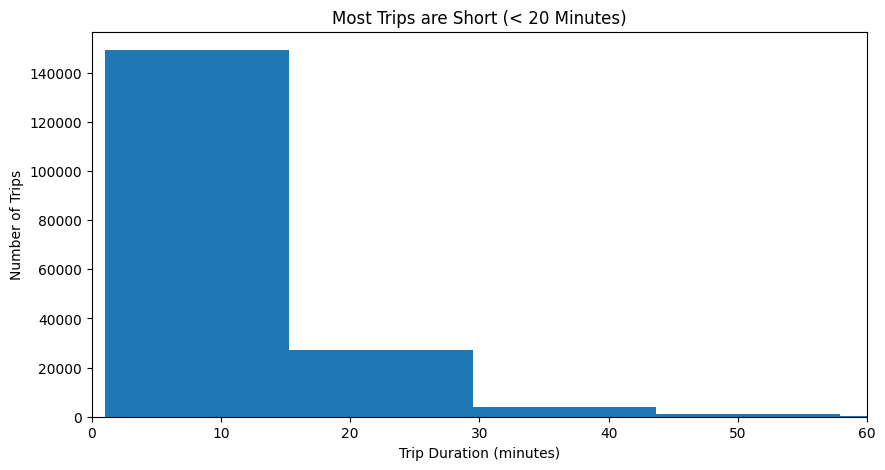

In [7]:
# Visualization 1: Trip Duration Distribution
plt.figure(figsize=(10,5))
plt.hist(df['trip_duration_min'], bins=100)
plt.xlim(0,60)
plt.title('Most Trips are Short (< 20 Minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Trips')
plt.show()


Most trips last less than 20 minutes, confirming that the system is used primarily for short rides.  
Outliers exist with very long durations, but they are rare.

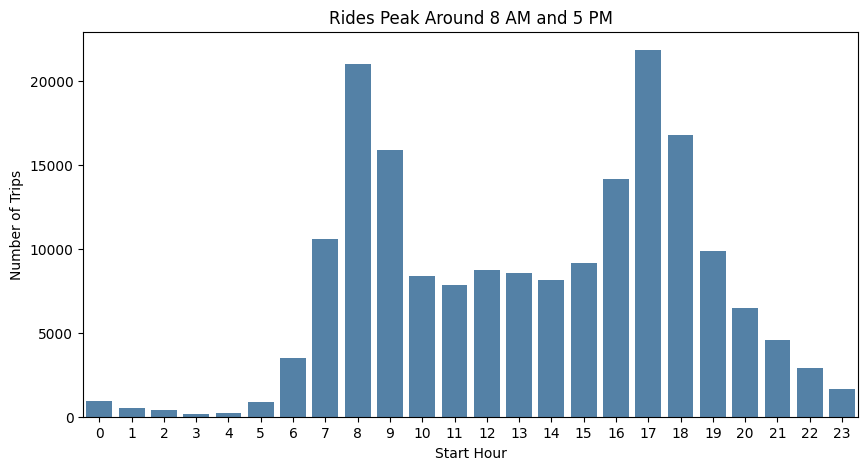

In [8]:
# Visualization 2: Start Hour Distribution
plt.figure(figsize=(10,5))
sns.countplot(x='start_hour', data=df, color='steelblue')
plt.title('Rides Peak Around 8 AM and 5 PM')
plt.xlabel('Start Hour')
plt.ylabel('Number of Trips')
plt.show()

Ride counts peak in the morning (8 AM) and evening (5 PM), showing clear commuting patterns.  
Few trips occur late at night.

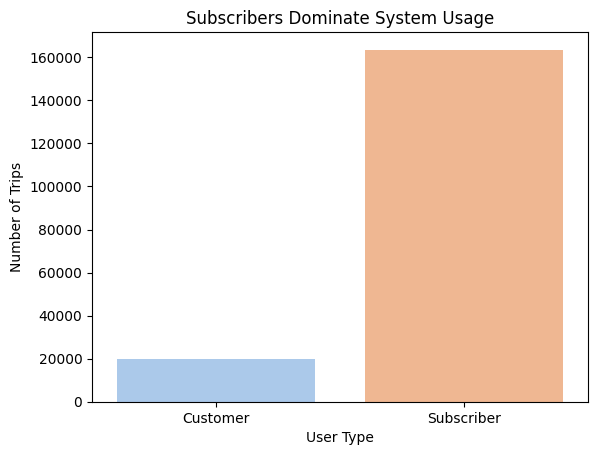

In [9]:
# Visualization 3: User Type Distribution
sns.countplot(x='user_type', data=df, palette='pastel')
plt.title('Subscribers Dominate System Usage')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()

Subscribers make up the majority of trips, suggesting that most users are regular commuters.

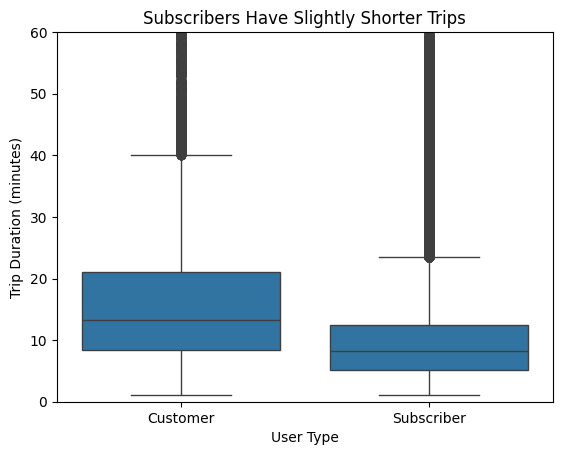

In [10]:
# Visualization 4: Trip Duration by User Type
sns.boxplot(x='user_type', y='trip_duration_min', data=df)
plt.ylim(0,60)
plt.title('Subscribers Have Slightly Shorter Trips')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.show()

Subscribers have slightly shorter trips than customers.  
Both groups have outliers, but most trips for both groups are below 20 minutes.

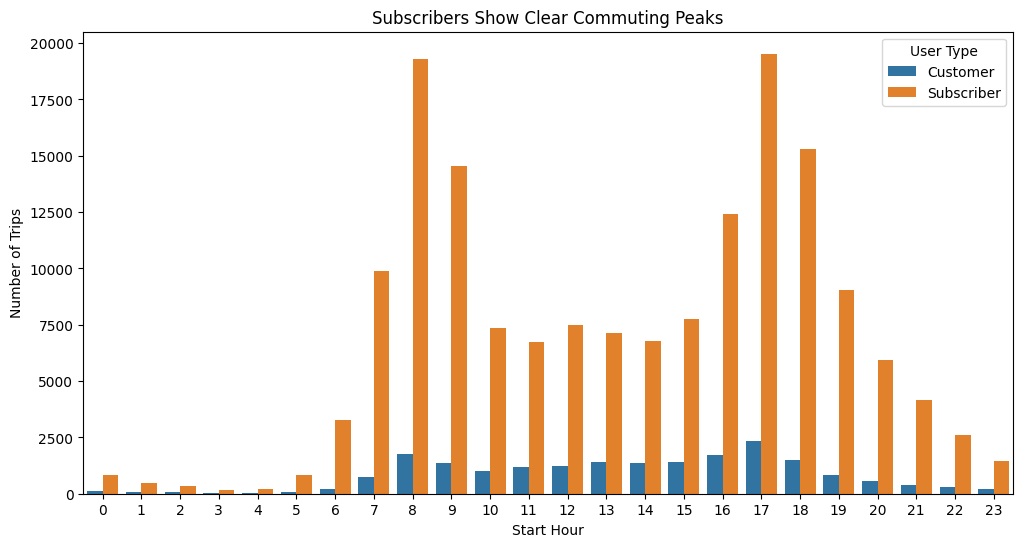

In [11]:
# Visualization 5: Start Hour by User Type
plt.figure(figsize=(12,6))
sns.countplot(x='start_hour', hue='user_type', data=df)
plt.title('Subscribers Show Clear Commuting Peaks')
plt.xlabel('Start Hour')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()

Subscribers ride most during commute hours (8 AM, 5 PM), while customers have a flatter distribution throughout the day.